In [39]:
#another Implementation of KNN as per the data science course 
import pandas as pd
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()
## Create a data frame from the dictionary 
species=[]
for x in iris.target:
    species.append(iris.target_names[x])

#print(species)
#we need the data in iris data set as values of the data frame,the columns are sepal_length,'Sepal_Width', 'Petal_Length', 'Petal_Width'
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
#print(iris)

#grouping the values according to species 
iris['Species'] = species
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').sum()

from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()

## Split the data into a training and test set by Bernoulli sampling
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
print(iris_split)

iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])

iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
#print(iris_train_features.shape)
#print(iris_train_labels.shape)
#print(iris_test_features.shape)
#print(iris_test_labels.shape)

from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

"""
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_iris(iris, col1, col2):
    sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

## Define and train the KNN model
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictionary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)
"""

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.439        -1.569       -1.444
25%          -0.901       -0.588        -1.228       -1.182
50%          -0.053       -0.125         0.336        0.133
75%           0.675        0.569         0.763        0.791
max           2.492        3.115         1.786        1.711
[matrix([[ -1.02184904e+00,   1.03205722e+00,  -1.39813811e+00,
          -1.18150376e+00,   0.00000000e+00],
        [ -1.87002413e+00,  -1.24957601e-01,  -1.51186952e+00,
          -1.44444970e+00,   0.00000000e+00],
        [  1.40150837e+00,   3.37848329e-01,   5.35295827e-01,
           2.64698913e-01,   1.00000000e+00],
        [  1.28034050e+00,   1.06445364e-01,   9.33355755e-01,
      

'\n%matplotlib inline\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndef plot_iris(iris, col1, col2):\n    sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg = False)\n    plt.xlabel(col1)\n    plt.ylabel(col2)\n    plt.title(\'Iris species shown by color\')\n    plt.show()\nplot_iris(iris, \'Petal_Width\', \'Sepal_Length\')\nplot_iris(iris, \'Sepal_Width\', \'Sepal_Length\')\n\n## Define and train the KNN model\nlevels = {0:\'setosa\', 1:\'versicolor\', 2:\'virginica\'}\niris_test[\'Species\'] = [levels[x] for x in iris_test[\'predicted\']]\nmarkers = {1:\'^\', 0:\'o\'}\ncolors = {\'setosa\':\'blue\', \'versicolor\':\'green\', \'virginica\':\'red\'}\ndef plot_shapes(df, col1,col2,  markers, colors):\n    import matplotlib.pyplot as plt\n    import seaborn as sns\n    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis\n    for m in markers: # iterate over marker dictionary keys\n        for c in colors: # iterate over color dictionary keys\n         

In [113]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values

In [5]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [8]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
y_pred = classifier.predict(X_test) 

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[10  0  0]
 [ 0 13  1]
 [ 0  2  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.80      0.67      0.73         6

    avg / total       0.90      0.90      0.90        30



In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

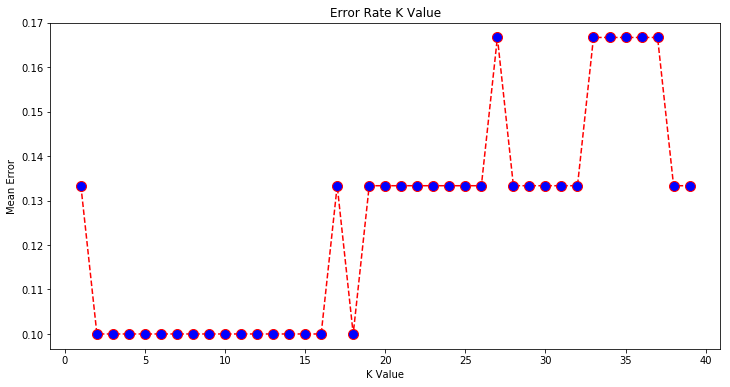

In [15]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')
plt.show(plt.ylabel('Mean Error'))

In [17]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  


In [20]:
X_train.sum()

1648.0

In [21]:
X_test.sum()

430.20000000000005

In [27]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [28]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [29]:
X_train

array([[-0.5025239 ,  1.44074797, -1.22456329, -1.23289737],
       [-0.1421482 , -0.16432934,  0.28920438,  0.05248651],
       [ 1.29935463,  0.29426417,  1.13018641,  1.46640878],
       [ 1.29935463,  0.06496741,  0.7937936 ,  1.46640878],
       [-1.58365103, -1.76940665, -1.33669422, -1.10435899],
       [ 0.21822751, -0.16432934,  0.62559719,  0.82371684],
       [ 2.26035652, -0.62292286,  1.6908411 ,  1.08079361],
       [-0.1421482 , -0.62292286,  0.45740078,  0.1810249 ],
       [-0.86289961,  1.67004472, -1.22456329, -1.10435899],
       [ 0.45847798, -1.99870341,  0.45740078,  0.43810167],
       [ 1.89998081, -0.62292286,  1.35444829,  0.95225523],
       [-0.38239867,  2.58723176, -1.28062875, -1.23289737],
       [ 0.21822751, -1.99870341,  0.73772813,  0.43810167],
       [-1.22327532,  0.75285769, -1.00030141, -1.23289737],
       [-0.98302485, -0.16432934, -1.16849782, -1.23289737],
       [-0.98302485,  0.98215445, -1.33669422, -1.10435899],
       [-0.74277437, -0.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  


In [31]:
X_train

array([[ 6. ,  2.7,  5.1,  1.6],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 5. ,  3.5,  1.3,  0.3],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 5.9,  3. ,  5.1,  1.8],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 5. ,  3.2,  1.2,  0.2],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 5.5,  2.6,  4.4,  1.2],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 5.6,  3. ,  4.1,  1.3],
       [ 6.2,  2.9,  4.3,  1.3],
       [ 6.4,  2.7,  5.3,  1.9],
       [ 5.9,  3. ,  4.2,  1.5],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 6.1,  2.8,  4. ,  1.3],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5. ,  2.3,  3.3,  1. ],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 6.2,  2.8,  4.8,  1.8],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.7,  2.9,  4.2,  1.3],
       [ 6

In [32]:
X_test

array([[ 6.9,  3.1,  5.1,  2.3],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 5.8,  2.7,  3.9,  1.2],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.4,  3.4,  1.5,  0.4],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 5. ,  3.5,  1.6,  0.6],
       [ 5.7,  2.8,  4.5,  1.3],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 6.7,  3.1,  4.4,  1.4],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 7.2,  3. ,  5.8,  1.6],
       [ 7.7,  3. ,  6.1,  2.3],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.5,  2.4,  3.8,  1.1],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 6.5,  3. ,  5.8,  2.2],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 6.3,  3.3,  6. ,  2.5],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5.1,  2.5,  3. ,  1.1]])

In [33]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 0.14440025, -0.82911308,  0.7095117 ,  0.47583251],
       [ 0.2647338 , -0.11161138,  0.59476588,  0.73957339],
       [ 0.14440025, -0.35077861,  0.36527422,  0.34396207],
       [-0.57760102,  2.04089373, -1.24116738, -1.10661278],
       [-1.0589352 ,  1.0842248 , -1.47065903, -1.23848322],
       [-0.21660038, -0.58994585,  0.13578256,  0.08022118],
       [-0.81826811, -0.82911308,  0.02103674,  0.21209163],
       [ 0.02406671, -0.11161138,  0.7095117 ,  0.73957339],
       [ 0.74606798, -0.11161138,  0.93900336,  0.73957339],
       [ 0.14440025, -2.02494925,  0.07840965, -0.31539014],
       [-1.0589352 ,  0.36672309, -1.52803195, -1.37035367],
       [ 0.98673507,  0.60589033,  1.05374919,  1.66266648],
       [ 2.19007053, -1.06828031,  1.74222416,  1.39892559],
       [ 0.74606798,  0.36672309,  0.7095117 ,  1.00331427],
       [-0.45726747, -1.06828031,  0.30790131, -0.05164926],
       [-0.33693393, -0.58994585,  0.59476588,  1.00331427],
       [-0.33693393, -0.

In [76]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [77]:
y_pred = classifier.predict(X_test)  

In [78]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [79]:
y_pred = classifier.predict(X_test) 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[13  0  0]
 [ 0  8  0]
 [ 0  3  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.73      1.00      0.84         8
 Iris-virginica       1.00      0.67      0.80         9

    avg / total       0.93      0.90      0.90        30



In [69]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

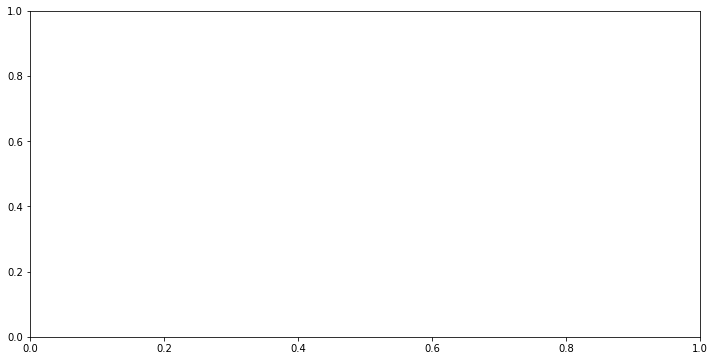

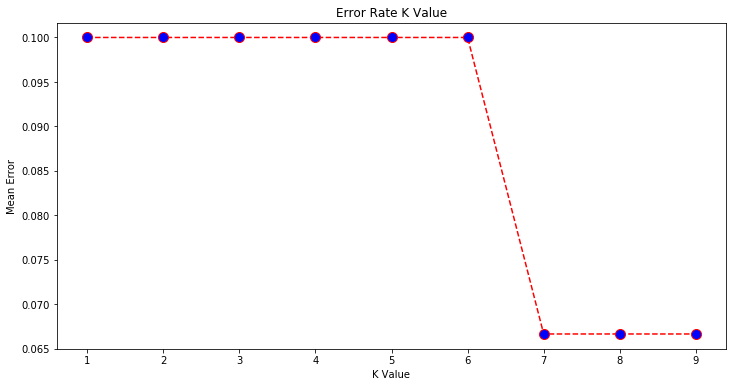

In [71]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')
plt.show(plt.ylabel('Mean Error'))

In [82]:
#plt.figure(figsize=(10,5))
plt.plot(range(1,10),error,color='red')

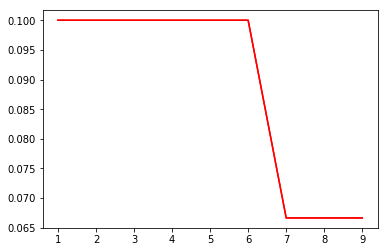

In [83]:

plt.show(plt.plot(range(1,10),error,color='red'))

In [114]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Fruit_data_with_colors.csv")
data

,1,apple,granny_smith,192,8.4,7.3,0.55
0,1,apple,granny_smith,180,8.0,6.8,0.59
1,2,mandarin,mandarin,86,6.2,4.7,0.80
2,2,mandarin,mandarin,84,6.0,4.6,0.79
3,2,mandarin,mandarin,80,5.8,4.3,0.77
4,2,mandarin,mandarin,80,5.9,4.3,0.81
5,2,mandarin,mandarin,76,5.8,4.0,0.81
6,1,apple,braeburn,178,7.1,7.8,0.92
7,1,apple,braeburn,172,7.4,7.0,0.89
8,1,apple,braeburn,166,6.9,7.3,0.93
9,1,apple,braeburn,172,7.1,7.6,0.92


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
1               57 non-null int64
apple           57 non-null object
granny_smith    57 non-null object
192             57 non-null int64
8.4             57 non-null float64
7.3             57 non-null float64
0.55            57 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.2+ KB


In [116]:
data.isnull().sum()

1               0
apple           0
granny_smith    0
192             0
8.4             0
7.3             0
0.55            0
dtype: int64

In [127]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [128]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [129]:
x=dataset.iloc[::-1].values

In [130]:
x

array([[5.9, 3.0, 5.1, 1.8, 'Iris-virginica'],
       [6.2, 3.4, 5.4, 2.3, 'Iris-virginica'],
       [6.5, 3.0, 5.2, 2.0, 'Iris-virginica'],
       [6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
       [6.7, 3.0, 5.2, 2.3, 'Iris-virginica'],
       [6.7, 3.3, 5.7, 2.5, 'Iris-virginica'],
       [6.8, 3.2, 5.9, 2.3, 'Iris-virginica'],
       [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'],
       [6.9, 3.1, 5.1, 2.3, 'Iris-virginica'],
       [6.7, 3.1, 5.6, 2.4, 'Iris-virginica'],
       [6.9, 3.1, 5.4, 2.1, 'Iris-virginica'],
       [6.0, 3.0, 4.8, 1.8, 'Iris-virginica'],
       [6.4, 3.1, 5.5, 1.8, 'Iris-virginica'],
       [6.3, 3.4, 5.6, 2.4, 'Iris-virginica'],
       [7.7, 3.0, 6.1, 2.3, 'Iris-virginica'],
       [6.1, 2.6, 5.6, 1.4, 'Iris-virginica'],
       [6.3, 2.8, 5.1, 1.5, 'Iris-virginica'],
       [6.4, 2.8, 5.6, 2.2, 'Iris-virginica'],
       [7.9, 3.8, 6.4, 2.0, 'Iris-virginica'],
       [7.4, 2.8, 6.1, 1.9, 'Iris-virginica'],
       [7.2, 3.0, 5.8, 1.6, 'Iris-virginica'],
       [6.4, 

In [131]:
y=dataset.iloc[:,4].values

In [132]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [133]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [136]:
x_train

array([[6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [7.6, 3.0, 6.6, 2.1, 'Iris-virginica'],
       [5.7, 2.8, 4.1, 1.3, 'Iris-versicolor'],
       [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [6.4, 3.2, 5.3, 2.3, 'Iris-virginica'],
       [6.9, 3.1, 4.9, 1.5, 'Iris-versicolor'],
       [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.5, 2.5, 4.0, 1.3, 'Iris-versicolor'],
       [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [5.0, 3.5, 1.6, 0.6, 'Iris-setosa'],
       [5.4, 3.0, 4.5, 1.5, 'Iris-versicolor'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.0, 3.3, 1.4, 0.2, 'Iris-setosa'],
      

In [137]:
x_test

array([[6.8, 2.8, 4.8, 1.4, 'Iris-versicolor'],
       [6.3, 2.7, 4.9, 1.8, 'Iris-virginica'],
       [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'],
       [6.7, 2.5, 5.8, 1.8, 'Iris-virginica'],
       [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.7, 2.9, 4.2, 1.3, 'Iris-versicolor'],
       [6.7, 3.1, 4.7, 1.5, 'Iris-versicolor'],
       [6.5, 3.0, 5.8, 2.2, 'Iris-virginica'],
       [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'],
       [6.4, 3.1, 5.5, 1.8, 'Iris-virginica'],
       [6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'],
       [7.7, 3.8, 6.7, 2.2, 'Iris-virginica'],
       [5.6, 3.0, 4.1, 1.3, 'Iris-versicolor'],
       [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'],
       [7.2, 3.2, 6.0, 1.8, 'Iris-virginica'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [6.9, 3.1, 5.1, 2.3, 'Iris-virginica'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'],
       [6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'],
       [6.0, 2.7, 5.1, 

In [138]:
y_train

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'I

In [139]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [141]:
from sklearn.neighbors import KNeighborsClassifier


In [142]:
classifier=KNeighborsClassifier(n_neighbors=5)


In [144]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [145]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30



In [146]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]


In [148]:
error=[]
for i in (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=Knn.Predict(x_test)
    error.append(np.mean(pred_i != y_test))

ValueError: could not convert string to float: 'Iris-virginica'

In [149]:
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.Predict(x_test)
    error.append(np.mean(pred_i != y_test))

ValueError: could not convert string to float: 'Iris-virginica'

In [150]:
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [152]:
plt.show(plt.plot(range(1,10)),error,color='red')

TypeError: show() got an unexpected keyword argument 'error_color'

In [153]:
plt.plot(range(1,10),error,color='red')

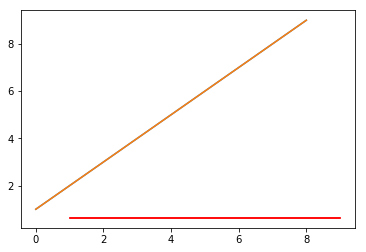

In [154]:
plt.show(plt.plot(range(1,10),error,color='red'))